In [1]:
import pandas as pd
def explore_dataset(file_path):
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        print("Unsupported file format. Please provide a CSV or Excel file.")
        return

    print("Dataset information:")
    print(df.info())
    print("\nFirst few rows:")
    print(df.head())
    print("\nUnique values for categorical columns:")
    for column in df.select_dtypes(include='object').columns:
        print(f"{column}: {df[column].nunique()} unique values")

# Example usage:
file_path = 'iris.csv'
explore_dataset(file_path)


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

First few rows:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Unique values for categorical columns:
variety: 3 unique values


Categorical variables: ['variety']
Numerical variables: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


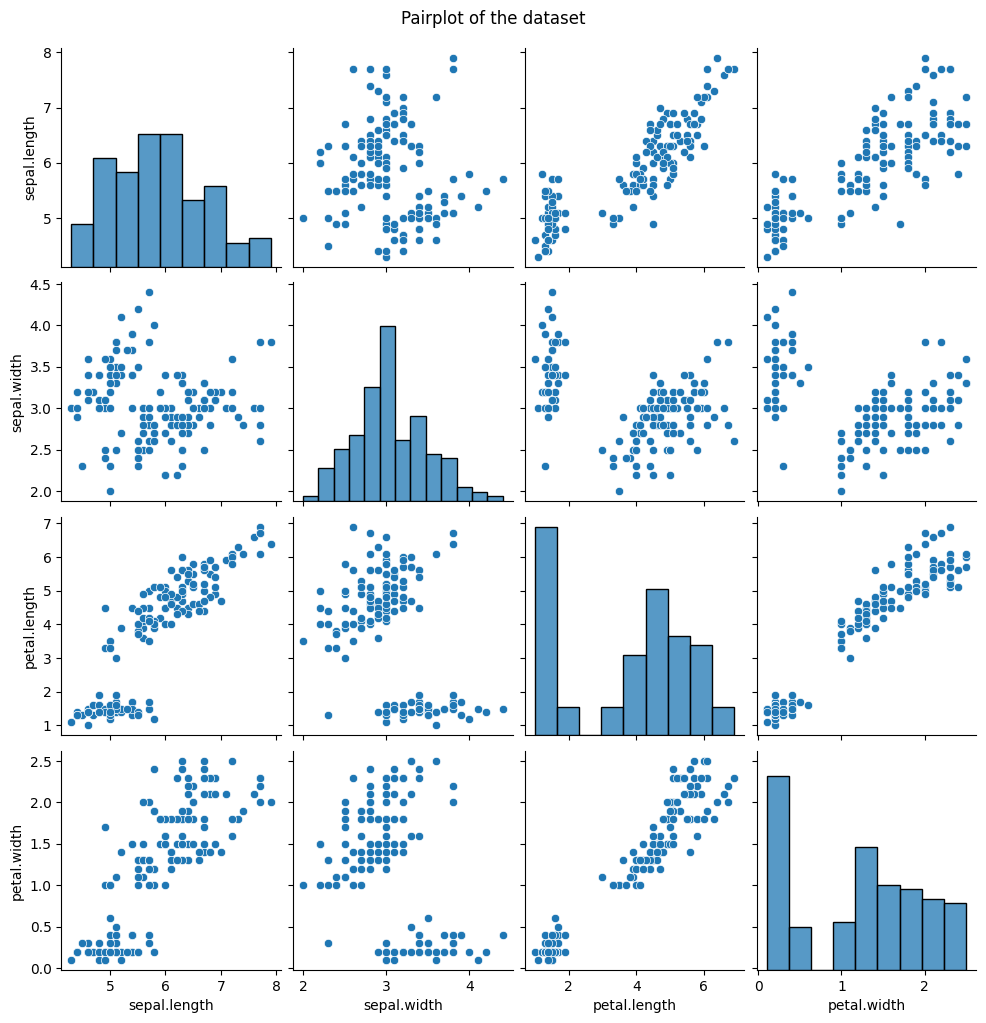

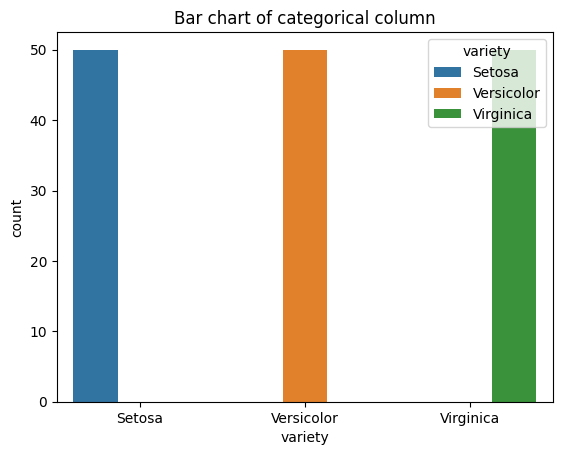

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("iris.csv")

# Identify categorical and numerical variables
cat = list(df.select_dtypes(include=['object']).columns)
num = list(df.select_dtypes(exclude=['object']).columns)

# Print categorical and numerical variables
print(f'Categorical variables: {cat}')
print(f'Numerical variables: {num}')

# Create a pairplot
sns.pairplot(df)
plt.suptitle("Pairplot of the dataset", y=1.02)
plt.show()

# Check if the last column is categorical and plot accordingly
if df.iloc[:, -1].dtype == 'object':
    sns.countplot(x=df.columns[-1], data=df, hue=df.columns[-1])
    plt.title('Bar chart of categorical column')
    plt.show()
else:
    print("No categorical value")


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('train.csv')

# Display the first three rows of the dataframe
print(df.head(3))

# Display the number of missing values per column
print(df.isnull().sum())

# Drop the 'Cabin' column
df = df.drop(columns='Cabin', axis=1)

# Fill missing values in 'Age' with the mean value of 'Age'
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing values in 'Embarked' with the mode value of 'Embarked'
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check for any remaining missing values
print(df.isnull().sum().sum())

# Drop unnecessary columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)

# Encode categorical variables
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Sex'] = le.fit_transform(df['Sex'])

# Display dataframe info
print(df.info())

# Separate features and target variable
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Display the standardized training set
print(X_train)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total

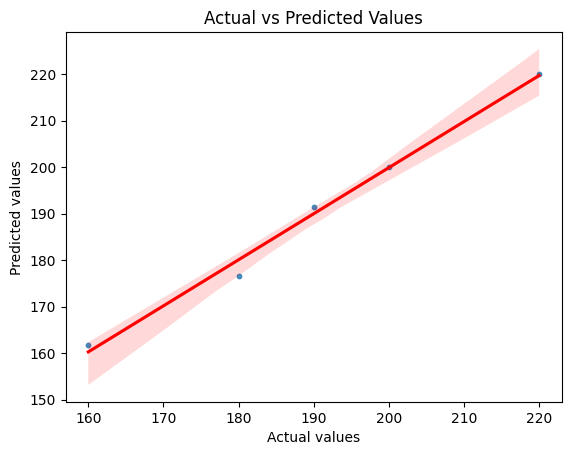

Enter size of house in sq. ft.: 2000
Enter the age of house in years: 4
Predicted price for a house with size 2000.0 sq. ft. and age 4.0 years is: Rs. 234.03571428571428 lakhs


E:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("housing.csv")
x = df.drop(columns=["price"], axis=1)
y = df["price"]

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

sns.regplot(x=y, y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values")
plt.show()

size = float(input("Enter size of house in sq. ft.: "))
age = float(input("Enter the age of house in years: "))
user_input = np.array([[size, age]])
predicted_house = model.predict(user_input)

print("Predicted price for a house with size {0} sq. ft. and age {1} years is: Rs. {2} lakhs".format(size, age, predicted_house[0]))


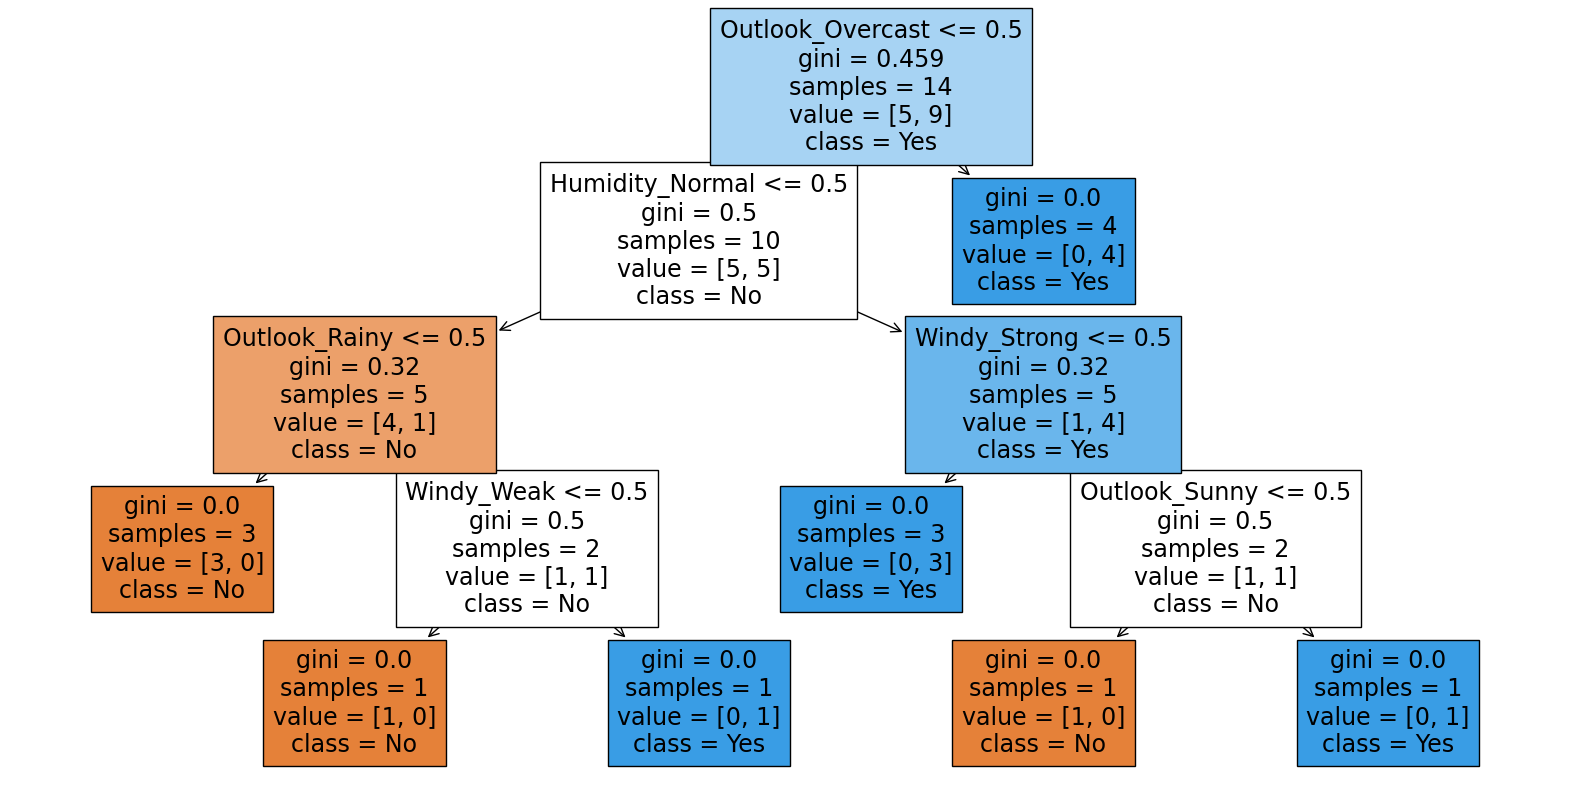

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the dataset
df = pd.read_csv("weather.csv")

# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(df, columns=['Outlook', 'Temp', 'Humidity', 'Windy'])

# Separate features (X) and target variable (y)
X = data_encoded.drop('Play Tennis', axis=1)
y = data_encoded['Play Tennis']

# Initialize DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=X.columns.tolist(), class_names=y.unique().tolist(), filled=True)
plt.show()


In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.8, random_state=42)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict cluster labels
labels = kmeans.predict(X)

# Plot the data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Data points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids', marker='X')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'